In [7]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import sys
sys.path.append('/Users/ayoubennassiri/Documents/Projects/advancedFML/')
sys.path.append('/Users/ayoubennassiri/Documents/Projects/advancedFML/src')

## Load the data

In [2]:
clean_data_path = '../data/processed/clean_IVE_tickbidask.parq'
#clean_data_path = '../data/processed/clean_WDC_tickbidask.parq'
df = pd.read_parquet(clean_data_path)

In [37]:
x = df.tail(30)
x

,price,bid,ask,vol,dollar_vol
date,,,,,
2019-03-18 15:49:35,114.4643,114.46,114.47,500,57232.1500
2019-03-18 15:49:35,114.4643,114.46,114.47,2520,288450.0360
2019-03-18 15:51:07,114.4300,114.43,114.44,377,43140.1100
2019-03-18 15:51:59,114.4276,114.42,114.43,210,24029.7960
2019-03-18 15:53:11,114.4180,114.41,114.42,137,15675.2660
2019-03-18 15:53:49,114.4100,114.41,114.41,200,22882.0000
2019-03-18 15:54:00,114.4200,114.41,114.42,147,16819.7400
2019-03-18 15:54:00,114.4300,114.42,114.43,2100,240303.0000
2019-03-18 15:54:01,114.4200,114.42,114.42,300,34326.0000


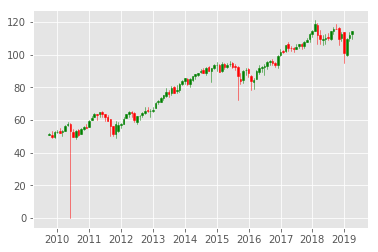

In [5]:
from src.visualization.candle import plot_candlestick_ohlc

df_ohlc = df.price.resample('1M').ohlc() 

fig, ax = plt.subplots()
plot_candlestick_ohlc(df_ohlc, ax, width=18)

### Use the ETF trick to deal with the roll
The data loaded are already ETF https://www.ishares.com/us/products/239728/ishares-sp-500-value-etf
TODO: Add example on any available stock.

## Bars

In [ ]:
from features.bars import tick_bar
from features.bars import volume_bar
from features.bars import dollar_bar

### Tick Bar

In [39]:
m = 10
tick_df = tick_bar(df, m)
tick_x = tick_bar(x, m)
tick_x

,price,bid,ask,vol,dollar_vol
date,,,,,
2019-03-18 15:49:35,114.4643,114.46,114.47,500,57232.15
2019-03-18 15:55:00,114.3700,114.38,114.39,200,22874.00
2019-03-18 15:58:05,114.3650,114.37,114.37,100,11436.50


You can see that tick took samples every 10 transactions

### Volume Bar

In [40]:
m = 1_000
vol_df = volume_bar(df, m)
vol_x = volume_bar(x, m)

In [41]:
vol_x

,price,bid,ask,vol,dollar_vol,cum_vol
date,,,,,,
2019-03-18 15:49:35,114.4643,114.46,114.47,2520,288450.0360,3020
2019-03-18 15:54:00,114.4200,114.41,114.42,147,16819.7400,1071
2019-03-18 15:54:00,114.4300,114.42,114.43,2100,240303.0000,2100
2019-03-18 15:55:00,114.3700,114.38,114.39,1163,133012.3100,1810
2019-03-18 15:56:25,114.3700,114.37,114.38,191,21844.6700,1043
2019-03-18 15:57:14,114.3799,114.37,114.38,905,103513.8095,1178
2019-03-18 15:59:49,114.4050,114.40,114.41,2729,312211.2450,3291
2019-03-18 16:00:00,114.4000,114.40,114.42,1272,145516.8000,1699


The tick volume in bars for the sample data has a cumulative volume bigger than the threshold m

### Dollar Bar

In [43]:
minute_df = df.price.resample('min').ohlc().dropna()

m = 100_000
dollar_df = dollar_bar(df, m)
dollar_x = dollar_bar(x, m)

In [44]:
dollar_x

,price,bid,ask,vol,dollar_vol,cum_dollar_vol
date,,,,,,
2019-03-18 15:49:35,114.4643,114.46,114.47,2520,288450.0360,345682.1860
2019-03-18 15:53:49,114.4100,114.41,114.41,200,22882.0000,105727.1720
2019-03-18 15:54:00,114.4300,114.42,114.43,2100,240303.0000,257122.7400
2019-03-18 15:55:00,114.3700,114.38,114.39,1163,133012.3100,207027.6400
2019-03-18 15:56:25,114.3700,114.37,114.38,191,21844.6700,119295.7700
2019-03-18 15:57:14,114.3799,114.37,114.38,905,103513.8095,134739.5995
2019-03-18 15:59:49,114.4050,114.40,114.41,2729,312211.2450,376494.2712
2019-03-18 16:00:00,114.4000,114.40,114.42,1272,145516.8000,194366.8700


The tick dollar bar depends on the threshold defined (100k dollars) and samples the price whenever this threshold is reached. 

In [47]:
print(f"Period : {tick_df.index[0]}, {tick_df.index[-1]}")
print(f"Shape of the initial data : {df.shape}, minute selected : {minute_df.shape}")
print(f"Shape of the tick bars : {tick_df.shape}")
print(f"Shape of the volume bars  : {vol_df.shape}")
print(f"Shape of the dollar bars : {dollar_df.shape}")

Period : 2009-09-28 09:30:00, 2019-03-18 18:30:00
Shape of the initial data : (1578372, 5), minute selected : (569452, 4)
Shape of the tick bars : (157838, 5)
Shape of the volume bars  : (452597, 6)
Shape of the dollar bars : (399036, 6)


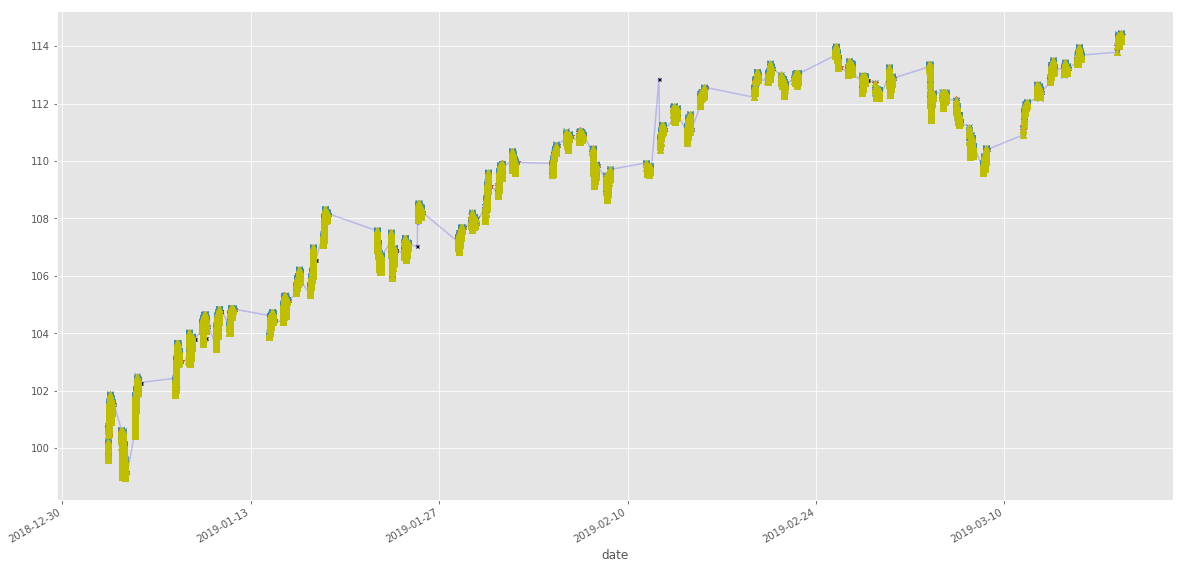

In [56]:
s_date='2019-01-01 8:00:00'
e_date='2019-03-18 18:40:00'
plt.figure(figsize=(20,10))
df.loc[s_date:e_date].price.plot(marker='o',
                                 ms=3,
                                 color='b',
                                 alpha=0.2,
                                 label='tick')

minute_df.open.loc[s_date:e_date].plot(marker='x',
                                       ms=3,
                                       ls='',
                                       color='k',
                                       label='tick')
tick_df.loc[s_date:e_date].price.plot(marker='*',
                                      ls='',
                                      label='tick bar')
vol_df.loc[s_date:e_date].price.plot(marker='x',
                                     ls='',
                                     label='vol bar')
dollar_df.loc[s_date:e_date].price.plot(marker='^',
                                        ls='',
                                        color='y',
                                        label='dollar bar')

### Number of bars produced by tick, volume and dollar bars

In [59]:
weekly_tick_count = tick_df.price.resample('1W').count()
weekly_vol_count = vol_df.price.resample('1W').count()
weekly_dollar_count = dollar_df.price.resample('1W').count()

In [60]:
count_df = pd.DataFrame(columns=['count_mean','count_std'], index=['tick', 'vol', 'dollar'])
count_df.loc['tick'] = [weekly_tick_count.mean(), weekly_tick_count.std()]
count_df.loc['vol'] = [weekly_vol_count.mean(), weekly_vol_count.std()]
count_df.loc['dollar'] = [weekly_dollar_count.mean(), weekly_dollar_count.std()]
count_df

,count_mean,count_std
tick,318.865,197.482
vol,914.337,543.375
dollar,806.133,570.013


From the plots below, the expectation is to see that the dollar bars is stable over time.
The bar size could be adjusted dynamically as a function of the free-floating market capitalization of a company (in the case of stocks) or the outstanding amound of issued debt (in the case of fixed-income securities)

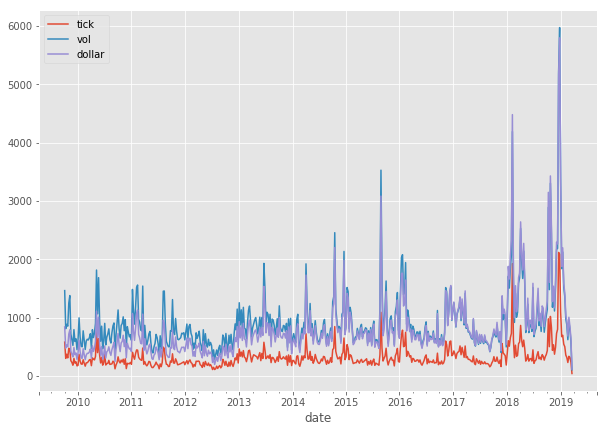

In [61]:
fig, ax = plt.subplots(1)
weekly_tick_count.plot(ax=ax)
weekly_vol_count.plot(ax=ax)
weekly_dollar_count.plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

In [62]:
def scale(s):
    return (s-s.min())/(s.max()-s.min())

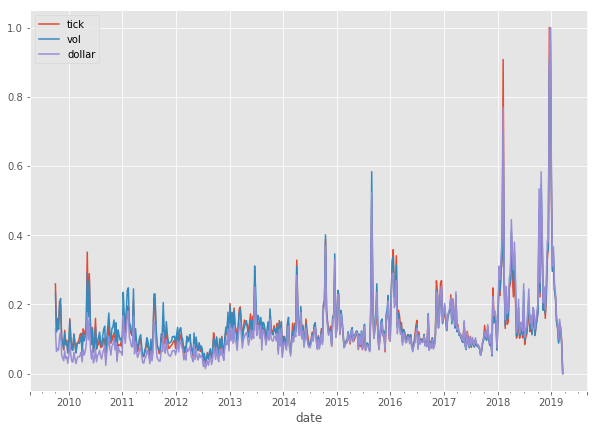

In [63]:
fig, ax = plt.subplots(1)
scale(weekly_tick_count).plot(ax=ax)
scale(weekly_vol_count).plot(ax=ax)
scale(weekly_dollar_count).plot(ax=ax)
ax.legend(["tick", "vol", 'dollar'])

## Serial correlation of returns 

In [64]:
# log returns
tick_returns = np.log(tick_df.price).diff().dropna()
vol_returns = np.log(vol_df.price).diff().dropna()
dollar_returns = np.log(dollar_df.price).diff().dropna()

In [66]:
returns_corr_df = pd.DataFrame(data={'returns_autocorr':[tick_returns.autocorr(lag=1),  
                                                         vol_returns.autocorr(lag=1), 
                                                         dollar_returns.autocorr(lag=1)]
                                    },
                               index=['tick', 'vol', 'dollar'])
returns_corr_df

,returns_autocorr
tick,-0.495171
vol,-0.214351
dollar,0.084936


The dollar bar method has the lowest serial correlation

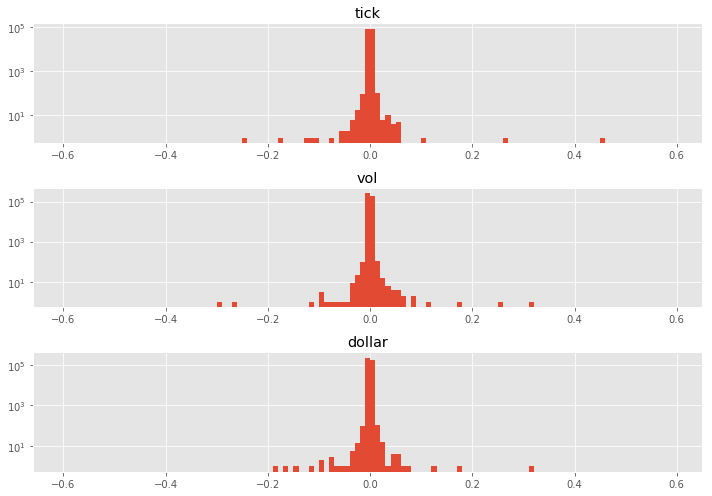

In [67]:
bins = np.arange(-0.6,0.6,0.01)
fig, ax = plt.subplots(3,1)
ax[0].hist(tick_returns, bins=bins)
ax[0].set_title('tick')
ax[1].hist(vol_returns, bins=bins)
ax[1].set_title('vol')
ax[2].hist(dollar_returns, bins=bins)
ax[2].set_title('dollar')
[a.set_yscale('log') for a in ax]
fig.tight_layout()